In [8]:
!pip install xlrd


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import pandas as pd
#data = pd.read_excel(r'C:/Users/excel/Downloads/archive/UCI_Credit_Card.xls',  skiprows=1)
#data.head()


data = pd.read_csv(r'C:\Users\excel\Downloads\archive\UCI_Credit_Card.csv')

## Take a look at the data:
print("rows:",data.shape[0]," columns:", data.shape[1])

rows: 30000  columns: 25


In [29]:
## Remove irrelevant features: 
data_clean = data.drop(columns=["ID", "SEX"])
data_clean.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,1,24,2,2,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,26,-1,2,0,0,0,2,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,34,0,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,1,37,0,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,2,1,57,-1,0,-1,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [31]:
## Check for missing values:
total = data_clean.isnull().sum()
percent = (data_clean.isnull().sum()/data_clean.isnull().count()*100)
pd.concat([total, percent], axis=1, 
keys=['Total', 'Percent']).transpose()


,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
## Check for outliers:
outliers = {}
for i in range(data_clean.shape[1]):
    min_t = data_clean[data_clean.columns[i]].mean() - (3 *  
            data_clean[data_clean.columns[i]].std())
    max_t = data_clean[data_clean.columns[i]].mean() + (3 *  
            data_clean[data_clean.columns[i]].std())
    count = 0
    for j in data_clean[data_clean.columns[i]]:
        if j < min_t or j > max_t:
            count += 1
    percentage = count/data_clean.shape[0]
    outliers[data_clean.columns[i]] = "%.3f" % percentage
print(outliers)

{'LIMIT_BAL': '0.004', 'EDUCATION': '0.011', 'MARRIAGE': '0.000', 'AGE': '0.005', 'PAY_0': '0.005', 'PAY_2': '0.005', 'PAY_3': '0.005', 'PAY_4': '0.006', 'PAY_5': '0.005', 'PAY_6': '0.004', 'BILL_AMT1': '0.023', 'BILL_AMT2': '0.022', 'BILL_AMT3': '0.022', 'BILL_AMT4': '0.023', 'BILL_AMT5': '0.022', 'BILL_AMT6': '0.022', 'PAY_AMT1': '0.013', 'PAY_AMT2': '0.010', 'PAY_AMT3': '0.012', 'PAY_AMT4': '0.013', 'PAY_AMT5': '0.014', 'PAY_AMT6': '0.015', 'default.payment.next.month': '0.000'}


yes %: 22.12 - no %: 77.88000000000001


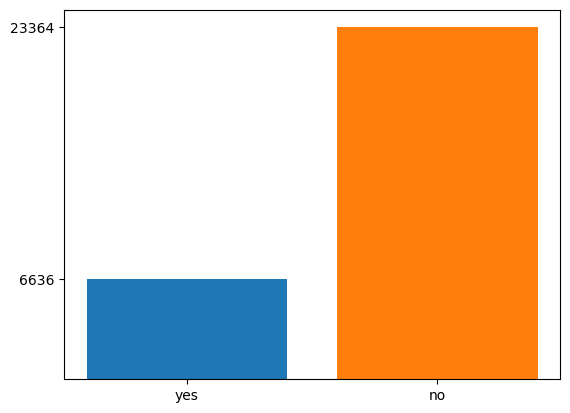

In [38]:
## Check for class imbalance: 
target = data_clean["default.payment.next.month"]
yes = target[target == 1].count()
no = target[target == 0].count()
print("yes %: " + str(yes/len(target)*100) + " - no %: " + str(no/
len(target)*100))

#plotting
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.bar("yes", yes)
plt.bar("no", no)
ax.set_yticks([yes,no])
plt.show()

## Collecting more data: 
## Changing performance metrics: 
## Resampling the dataset:

In [40]:
data_yes = data_clean[data_clean["default.payment.next.month"]  
                      == 1]
data_no = data_clean[data_clean["default.payment.next.month"]  
                     == 0]
over_sampling = data_yes.sample(no, replace=True, random_state  
                                = 0)
data_resampled = pd.concat([data_no, over_sampling], axis=0)

In [42]:
## Split features from target: 
X = data_clean.drop(columns=["default.payment.next.month"])
y = data_clean["default.payment.next.month"] 

In [43]:
## Rescale the data
X = (X - X.min())/(X.max() - X.min())
X.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.010101,0.333333,0.333333,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,...,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,0.333333,0.666667,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,...,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,0.333333,0.666667,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,...,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,0.333333,0.333333,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,...,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.333333,0.333333,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,...,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


In [44]:
final_data = pd.concat([X, y], axis=1)
final_data.to_csv("dccc_prepared.csv", index=False)